# Process all data with 3C 279 or Geminga

In [10]:
%matplotlib inline
from importlib import reload
import main, light_curve
import corner
import warnings
warnings.filterwarnings('error')

### Geminga: load data

In [11]:
%%time 
self = main.Main('Geminga',  interval=1, mjd_range=None,        
                 weight_file='../data/geminga_weights.pkl')

Source Geminga at: (l,b)=(195.134,4.266); ROI radius=5
Loading data from 127 months 
	Selected 1344372 photons within 5 deg of  (195.13,4.27)
	Dates: 2008-08-04 15:45 - 2018-08-02 18:48
	MJD  : 54682.7          - 58332.8         
Adding weights from file /nfs/farm/g/glast/u/burnett/analysis/lat_timing/data/geminga_weights.pkl
	242 / 1331395 photon pixels are outside weight region
	212440 weights set to NaN
CPU times: user 1min 7s, sys: 12.7 s, total: 1min 20s
Wall time: 1min 14s


#### Create a BinnedWeights object with all data, check it

Binning: 3650 intervals of 1 days from 54683.00 to 58333.00


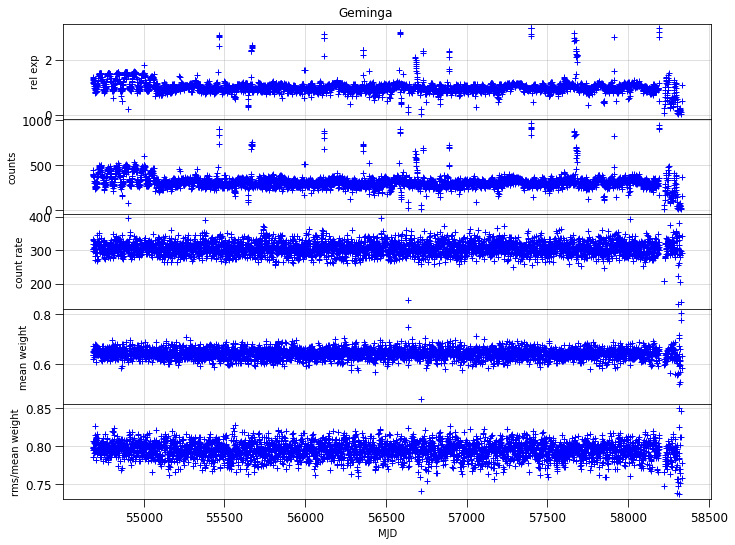

In [12]:
bw=self.binned_weights()
bw.test_plots();

#### Now pass that to the LightCurve class, which does fitting

In [13]:
lc = light_curve.LightCurve(bw); 
%time lc.fit(fix_beta=False)

Loaded 3562 / 3650 cells with exposure > 0.3 for light curve analysis
CPU times: user 6.38 s, sys: 6 ms, total: 6.38 s
Wall time: 6.39 s


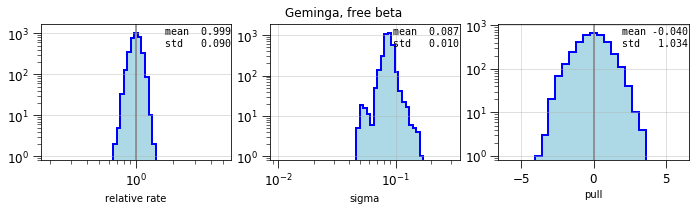

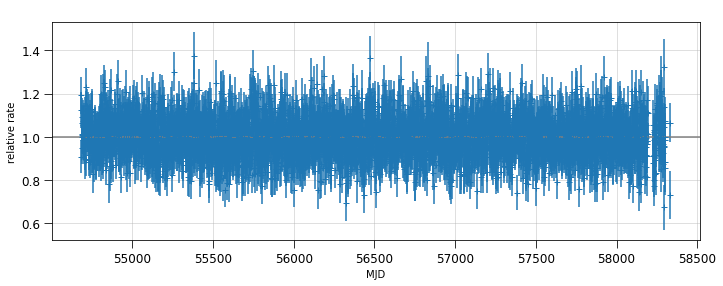

In [14]:
lc.fit_hists(title='Geminga, free beta')
lc.rate_plot(title=' ')

### Fit with fixed beta
(as in Fig 1)

In [15]:
%time lc.fit(fix_beta=True)

CPU times: user 2.27 s, sys: 3 ms, total: 2.27 s
Wall time: 2.29 s


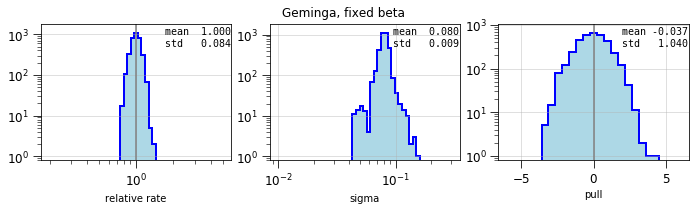

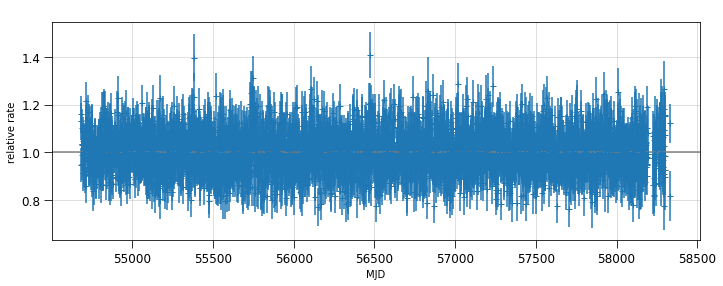

In [16]:
lc.fit_hists(title = 'Geminga, fixed beta')
lc.rate_plot(title=' ')

In [17]:
df = lc.fit_df
df.loc[:,'pull']=(df.rate-1)/df.sigma

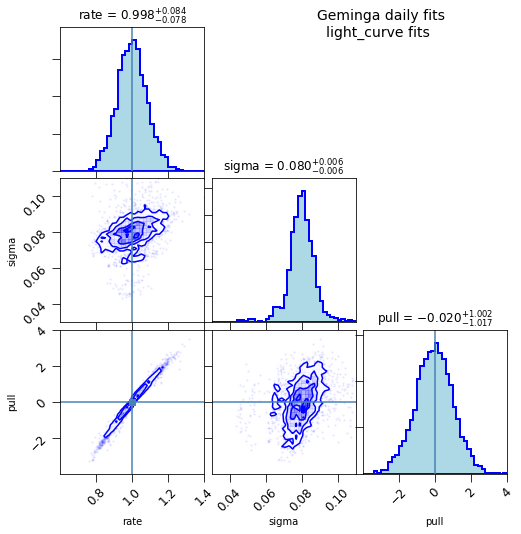

In [22]:
corner.corner(df['rate sigma pull'.split()], bins=40, 
              range=[(0.6,1.4), (0.03,0.11),(-4,4)],
              color='blue',show_titles=True, truths=(1.0,None, 0), title_fmt='.3f', 
              hist_kwargs=dict(histtype='stepfilled',facecolor='lightblue', lw=2, edgecolor='blue'));
plt.gcf().suptitle('Geminga daily fits\n  light_curve fits', x=0.6, ha='left', fontsize=14);